In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [6]:
df = pd.read_csv("../../Excel Files/wine_fraud.csv")

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [9]:
print(df["quality"].unique())

['Legit' 'Fraud']


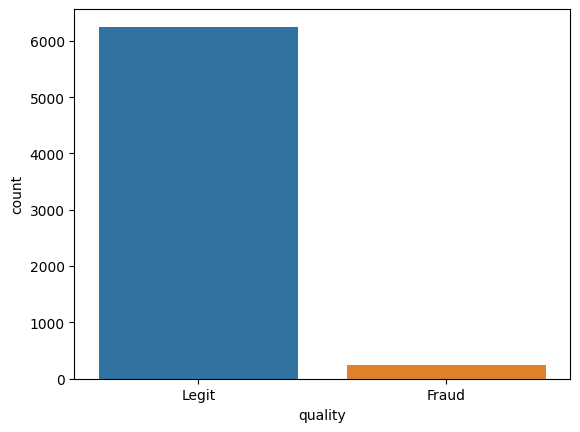

In [11]:
sns.countplot(x="quality",data=df,hue="quality",legend=False)
plt.show()

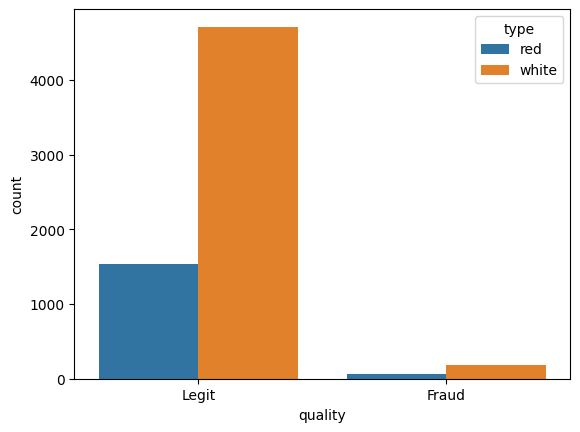

In [12]:
sns.countplot(x="quality",data=df,hue="type")
plt.show()

In [25]:
redWine = len(df[(df["type"]=="red")& (df["quality"]=="Fraud")]["type"]) / len(df[df["type"]=="red"]["type"])
print(f"Percentage of Fraud In Red Wines: {redWine * 100}")
whiteWine = len(df[(df["type"]=="white")& (df["quality"]=="Fraud")]["type"]) / len(df[df["type"]=="white"]["type"])
print(f"Percentage of Fraud In White Wines: {whiteWine * 100}")

Percentage of Fraud In Red Wines: 3.9399624765478425
Percentage of Fraud In White Wines: 3.7362188648427925


In [39]:
df["Fraud"] = df["quality"].map({"Fraud":1,"Legit":0})

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: Fraud, Length: 6497, dtype: int64

<Axes: >

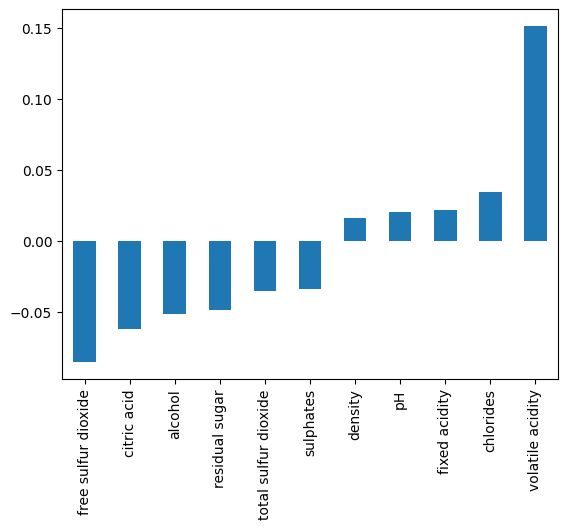

In [43]:
df.corr(numeric_only=True)["Fraud"][:-1].sort_values().plot(kind="bar")

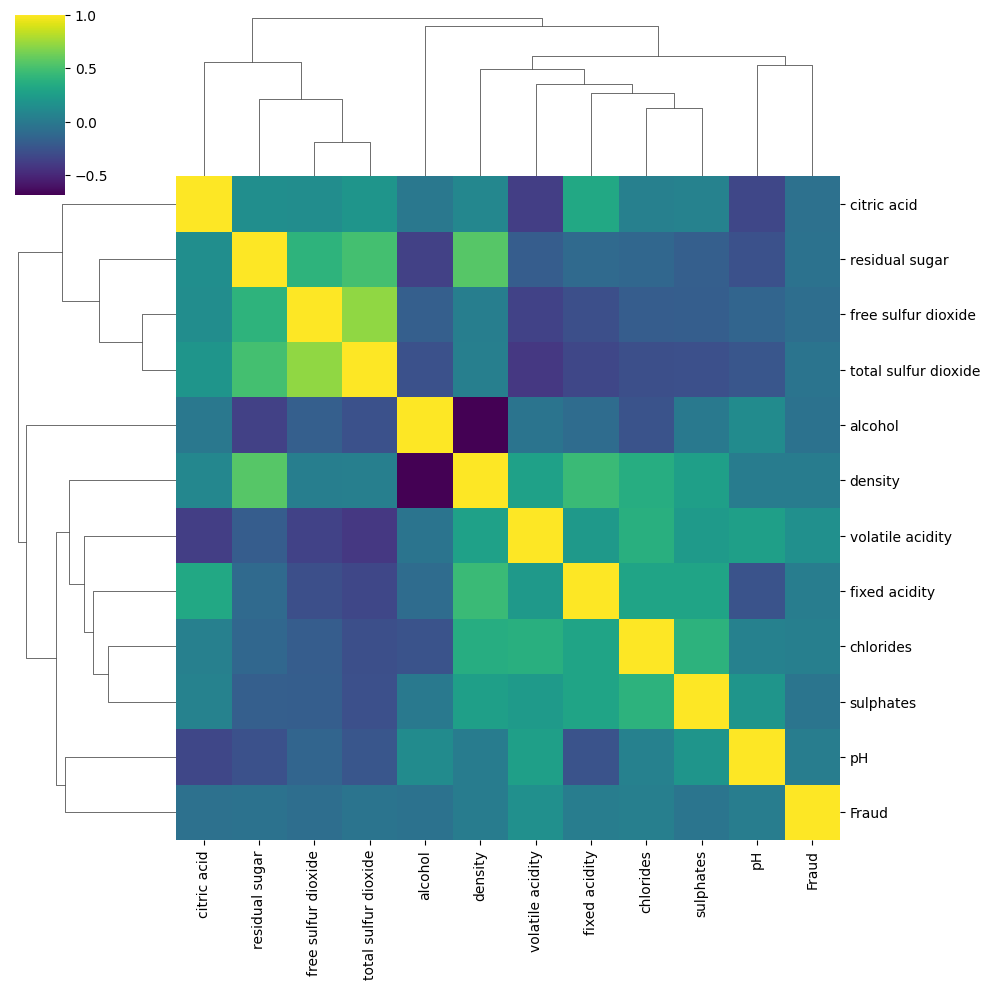

In [45]:
sns.clustermap(df.corr(numeric_only=True),cmap="viridis")

In [46]:
df = df.drop("Fraud",axis=1)
df["type"] = pd.get_dummies(df["type"],drop_first=True)

In [48]:
X = df.drop("quality",axis=1)
y = df["quality"]

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  =train_test_split(X,y,test_size=0.1,random_state=101)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.svm import SVC

In [54]:
baseModel = SVC(class_weight="balanced")

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
paramGrid={"C":[0.001,0.01,0.1,0.5,1]}

In [58]:
gridModel = GridSearchCV(baseModel,paramGrid)

In [59]:
gridModel.fit(X_train,y_train)

,estimator,SVC(class_weight='balanced')
,param_grid,"{'C': [0.001, 0.01, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [67]:
print(gridModel.best_params_)

{'C': 1}


In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
yPredictions = gridModel.predict(X_test)

In [65]:
print(confusion_matrix(y_test,yPredictions))

[[ 17  10]
 [ 92 531]]


In [66]:
print(classification_report(y_test,yPredictions))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

